# Generating Simulated Datasets for Regression Problems (Linear & Non-Linear)

This tutorial aims to learn how to create a sample dataset for regression problems. I will be covering linear regression and non-linear regression equations (polynomic, exponential...). I will continue updating this tutorial with new regression problems in the future.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## Linear Regression

To build a linear regression equation, an option is to use the function make_regression from the Sklearn library. The mean parameters you can add to this function are:

* n_sample: number of samples
* n_features: number of variables
* n_informative: number of informative variables to create the output
* n_targets
* noise: stardard deviation of the output
* random_state: the seed to control the randomness of the output

You can take a look to the rest of the parameters on sklearn documentation https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [ ]:
# Calculating a sample of X and Y values
x, y = datasets.make_regression(n_samples = 200, n_features = 1,
                                n_informative = 1, n_targets = 1,
                                noise = 20, random_state=12345, effective_rank=None)

If you want to determine in which range X and Y values are moving, you can use a Numpy function called np.intern() specifying the mininum and the maximum for each one:

In [ ]:
x = np.interp(x, (x.min(), x.max()), (3876, 15678))
y = np.interp(y, (y.min(), y.max()), (1678, 5435))

Let's plot the function to see what it looks like:

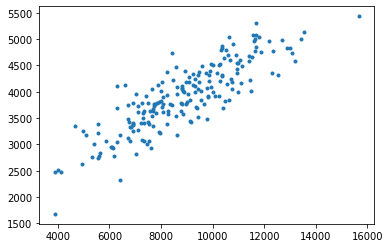

In [ ]:
plt.ion()
plt.plot(x,y,'.')

## Non-linear Regression

### Polynomial Regression

In the case of polynomic regression, we need to apply a more complex methodology. For this example, I will be calculating a cubic equation. So, we are looking for an equation that has the following form:

y = ax^3 + bx^2 + cx + d

First, let's determine the X coordinates of the maximum and the minimum values that we want to build the first derivative of our desired function.

To build my function for this specific exercise, I will use max_x = 3000 and min_y = 5000.

Then, it is necessary to create the factorial function based on those values. In this case, it will be the following one:

f'(x) = (x - 3000)(x - 5000)

After developing, we have the following equation:

f'(x) = x^2 - 8000x + 1.5·10^7

As I said, this is the first derivative. To get our cubic equation, it's necessary to integrate using the Scipy and Sympy libraries.

In [ ]:
# Importing the Scipy & Sympy libraries
import scipy as sp
from sympy import *

In [ ]:
# Creating the X symbol that will be our unknown factor
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')

# Integrating the first derivative to get the cubic equation
integrate(x**2 - 8000*x + 1.5*(10**7), x)

This is the result of the integral that will be the base to build our cubic equation. All equations have different types of transformations. 

* The first one is changing the D value. This will move the function up and down over the coordinate axis.
* The second one is to multiply or divide the whole function to stretch or flatten it.

Let's plot the resultant equation to see what it looks like:


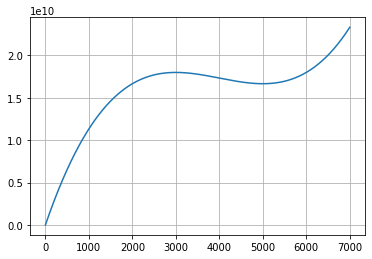

In [ ]:
# Creating a function to plot the cubic equation
def plot_me(a, b, c, d):
    x = np.arange(0, 7000, 0.05)
    y = [(a*i**3 + b*i**2 + c*i + d) for i in x]
    plt.plot(x, y, label='cubic', linestyle='-')
    plt.grid(True)
    plt.show(block=False)
    plt.pause(10)
    plt.close()

#General equation for a cubic function is y= ax3 + bx2 + cx + d
plot_me(1/3, -4000, 15000000, 0)

Let's do some transformations over the equation, so the range for the Y value is between 0 and 5000. To do so, I will divide the whole equation by 1500000. Also, I will move it 3000 units up (this means d = 3000).

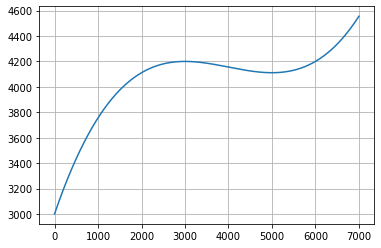

In [ ]:
#General equation for a cubic function is y= ax3 + bx2 + cx + d
plot_me(0.3333333/15000000, -4000/15000000, 15000000/15000000, 3000)